<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AI3_VallejoPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats as ss
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##**PRELIMINAR: LECTURA Y REVISIÓN DE DATAFRAME**


---

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PauForestal/master_bdds/main/Modulo2/datos_ventas.csv', sep=';',  decimal = ',')

In [3]:
df.head()

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [5]:
df.describe(include=['float64'])

,Inversion,Ventas
count,38.000000,38.000000
mean,10.250000,10.492895
std,5.556528,4.315321
min,1.000000,0.620000
25%,5.625000,7.565000
50%,10.250000,11.080000
75%,14.875000,14.032500
max,19.500000,17.450000


El dataframe cuenta con una dimensión de 3 variables y 38 observaciones, y dice relación con las inversiones y ventas realizadas por una empresa entre los años 1980 y 2017. Sus variables son las siguientes:

- **Fecha_anual**: Esta variable indica el año en el que ocurre cada observación. Es una variable cuyo origen es del tipo continua pero en el uso del presente dataframe es una varialbe cualitativa ordinal. Asimismo, en función de su análisis es una variable categórica ya que sirve para clasificar el año en que ocurrieron las observaciones.
- **Inversion**: Esta variable se refiere a la inversión realizada en el periodo informado, es una variable cuantitativa continua. En función del análisis de datos es una variable analítica.
- **Ventas**: Esta variable se refiere a las ventas ocurridas en el periodo informado y al igual que la variable "Inversión" es Cuantitativa Continua y en función del análisis es analítica.

Tanto las variables Inversion como Ventas están expresadas en millones de Euros.

### **OBSERVACIÓN DE VARIABLES MEDIANTE GRAFICO DE DISPERSIÓN**


---



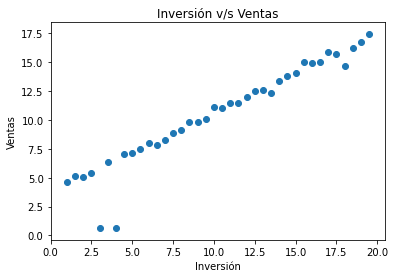

In [32]:
# raw data
inversion = df["Inversion"] 
ventas = df["Ventas"] 

# labels
plt.title("Inversión v/s Ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(inversion.min()-1 , inversion.max()+1 )
plt.ylim(ventas.min()-1 , ventas.max()+1 )

plt.scatter(inversion, ventas)
plt.show()

A través de la gráfica anterior, se puede observar con bastante claridad que las variables Inversión y Ventas están fuertemente relacionadas, es así que en general, cuando la inversión (variable independiente o x) crece, las ventas (variable dependiente o y) también crecen. Esto permite determinar que el modelo de ajuste será el de Regresión Lineal Simple.

###**MODELO DE REGRESION LINEAL**

In [154]:
#Función para estimar parámetros b0 y b1 (coeficiente y pendiente)
def estimate_b0_b1(x, y):
    n = np.size(x)
    #Promedios de X y de Y
    mean_x, mean_y = np.mean(x), np.mean(y)

    #Sumatoria de XY y Sumatoria de XX
    sum_xy = np.sum((x - mean_x) * (y - mean_y))
    sum_xx = np.sum(x * (x - mean_x))

    #coeficientes de regresion
    b_1 = sum_xy / sum_xx
    b_0 = mean_y - b_1 * mean_x

    return(b_0, b_1)

#Funcion para graficar regresión lineal
def plot_regression(x, y, b):
    plt.figure(figsize=(9, 6))

    plt.scatter(x, y, color = "r", marker = "o", s=30, label='observed')

    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "b", label='fit')

    plt.title('Distribución de Inversión v/s Ventas')
    plt.xlabel('Inversión')
    plt.ylabel('Ventas')
    plt.legend(loc='best')
    plt.grid(linestyle='dotted')
    plt.text(16, 1.2, r'$y = 2.88 + 0.74x$')
    plt.show()

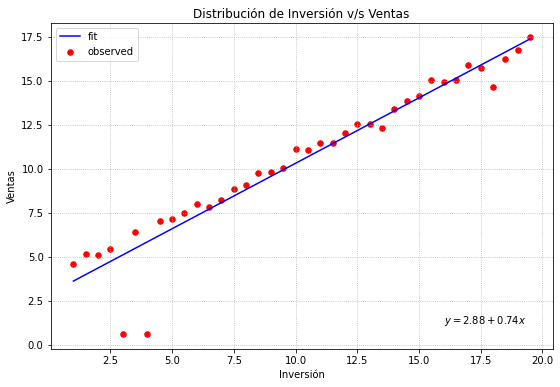

In [155]:
def main():
    #DATASET
    x = df['Inversion']
    y = df['Ventas']

    #Obtención de parámetros b0 y b1
    b = estimate_b0_b1(x, y)

    #Graficamos nuestra linea de regresion
    plot_regression(x, y, b)

if __name__== "__main__":
    main()

Al ajustar a través del Modelo de Regresión Lineal Simple, obtenemos un modelo bastante ajustado. Los parámtros obtenidos y su comprensión son los siguientes:

- **b0**: También conocido como la constante del modelo. Indica el punto de corte con el eje Y. Desde donde se comienz

In [7]:
covarianza = df.cov()["Inversion"]["Ventas"]
covarianza

22.92993243243243

In [90]:
# Correlacion 
correlacion = df.corr(method="pearson")["Inversion"]["Ventas"]
correlacion

0.9562823420491507

In [100]:
# Matriz de correlación
correlacion = df[['Inversion','Ventas']].corr()
correlacion.style.background_gradient(cmap='coolwarm').set_precision(3)

,Inversion,Ventas
Inversion,1.000,0.956
Ventas,0.956,1.000


In [89]:
coeficiente_determinacion = correlacion ** 2
coeficiente_determinacion

0.9144759177150089

In [153]:
# Modelo matemático
pendiente, coeficiente, pearson, p, error = ss.linregress(df['Inversion'], df['Ventas'])
print(f'La pendiente de la regresión lineal es: {pendiente}\nEl coeficiente es: {coeficiente}\nLa correlación con método Pearson es: {pearson}\nEl valor de p (p-value) es: {p}\nEl error cuadrático medio es: {error}')

#Función para predecir ventas según la inversión
def Ventas(Inversion):
    return coeficiente + (Inversion * pendiente)

La pendiente de la regresión lineal es: 0.7426698763540868
El coeficiente es: 2.8805285042127142
La correlación con método Pearson es: 0.9562823420491505
El valor de p (p-value) es: 8.25497955552195e-21
El error cuadrático medio es: 0.0378532029452961


In [31]:
Ventas(7.0)

8.079217638691322

## **Descripción de la tarea**
Una empresa os ha facilitado las inversiones y las ventas obtenidas desde el año 1980 hasta 2017.

Necesitáis realizar las siguientes tareas:

1. Ajustar un modelo de regresión lineal. Obtener una estimación de los parámetros del modelo y su interpretación.
2. ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros?
3. Evaluar el modelo a través de la SCE y el coeficiente de determinación.
4. Comenta y justifica todos los resultados obtenidos en cada apartado.

**Observaciones:**

1. El dataset se llama datos_ventas.csv.
2. La unidad monetaria está en millones de euros.